In [42]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Load the data into a Pandas DataFrame
df_pet_adoption = pd.read_csv(
    "Output/pet_adoption_renamed.csv", index_col="Pet_ID")

# Display sample data
df_pet_adoption.head(10)

,Pet_Type,Breed,Age_in_Months,Color,Size,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood
Pet_ID,,,,,,,,,,,,
500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
505,Dog,Labrador,70,Brown,Large,20.986261,0,0,87,301,1,0
506,Bird,Parakeet,169,Brown,Small,10.902613,1,0,70,440,1,0
507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1
508,Bird,Parakeet,49,Brown,Medium,24.597598,1,1,69,405,0,0


In [44]:
df_pet_adoption.columns.values.tolist()

['Pet_Type',
 'Breed',
 'Age_in_Months',
 'Color',
 'Size',
 'Weight_in_Kg',
 'Vaccinated',
 'Health_Condition',
 'Days_in_Shelter',
 'Adoption_Fee',
 'Previous_Owner',
 'Adoption_Likelihood']

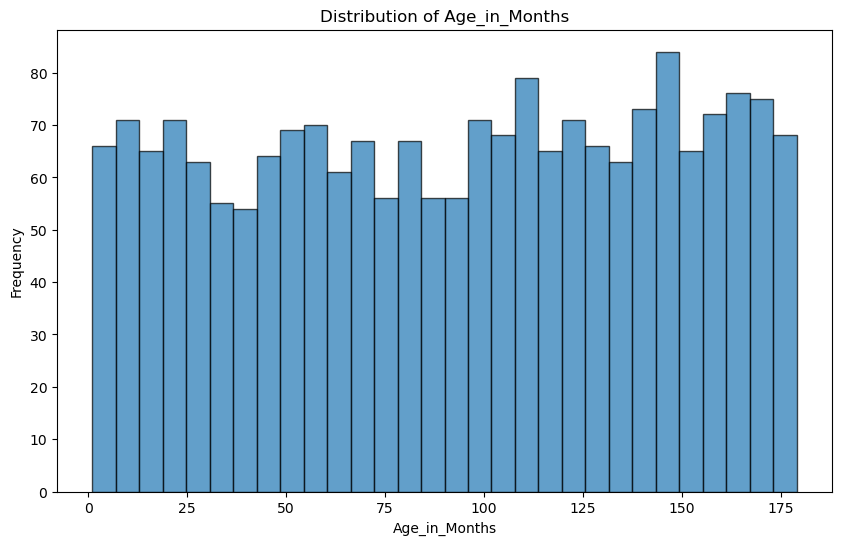

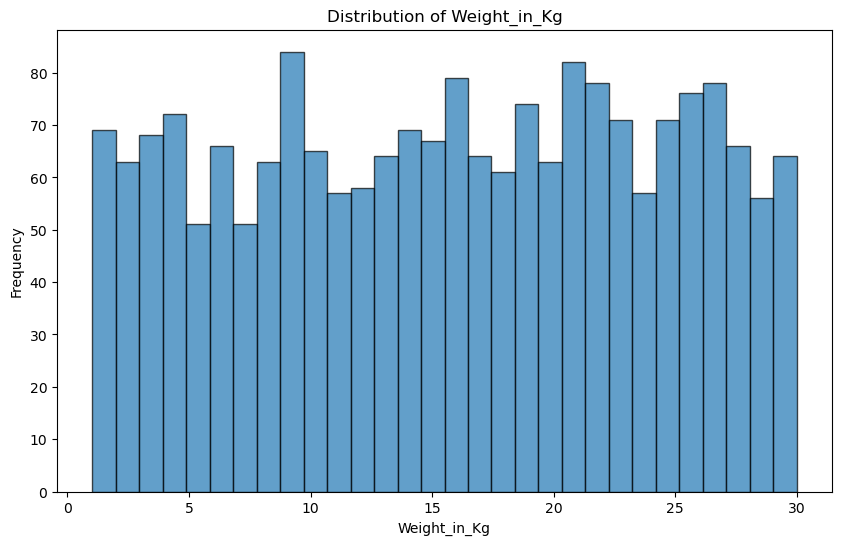

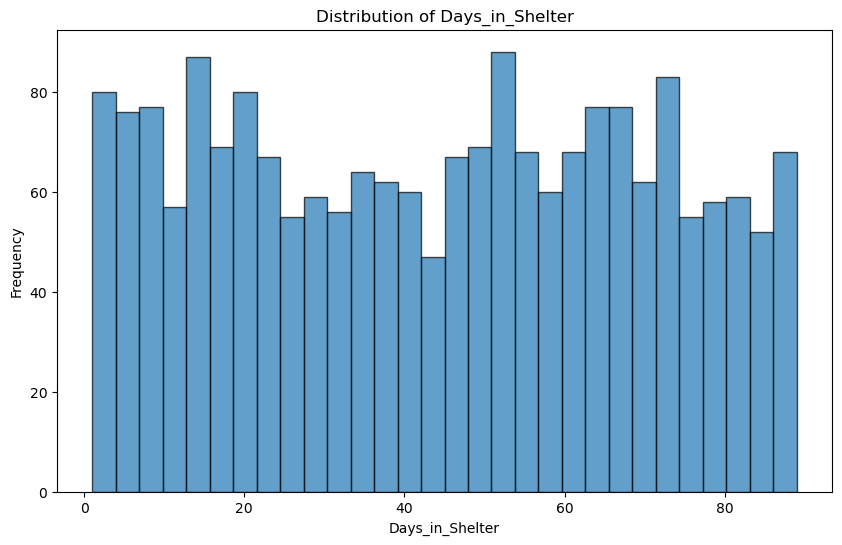

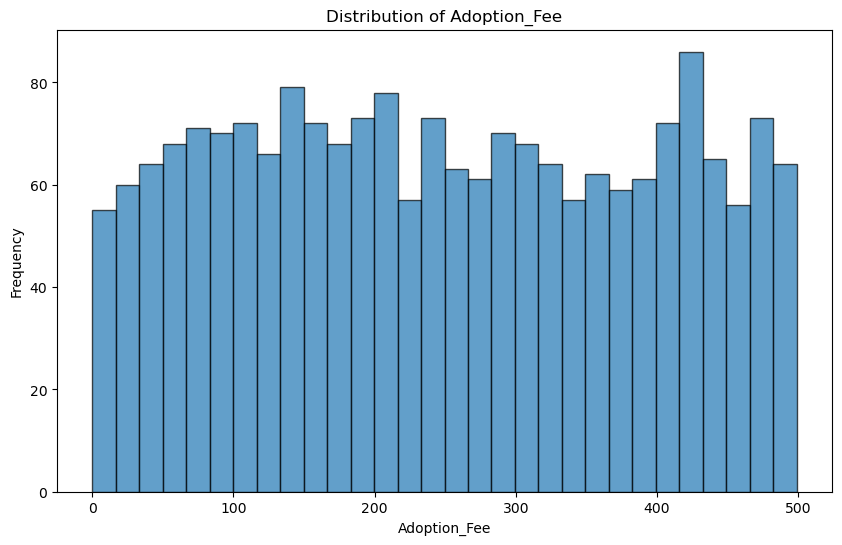

In [116]:
# Distribution plots
numerical_features = ['Age_in_Months', 'Weight_in_Kg', 'Days_in_Shelter', 'Adoption_Fee']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.hist(df_pet_adoption[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f"output_dir/{feature}.png")
    plt.show()

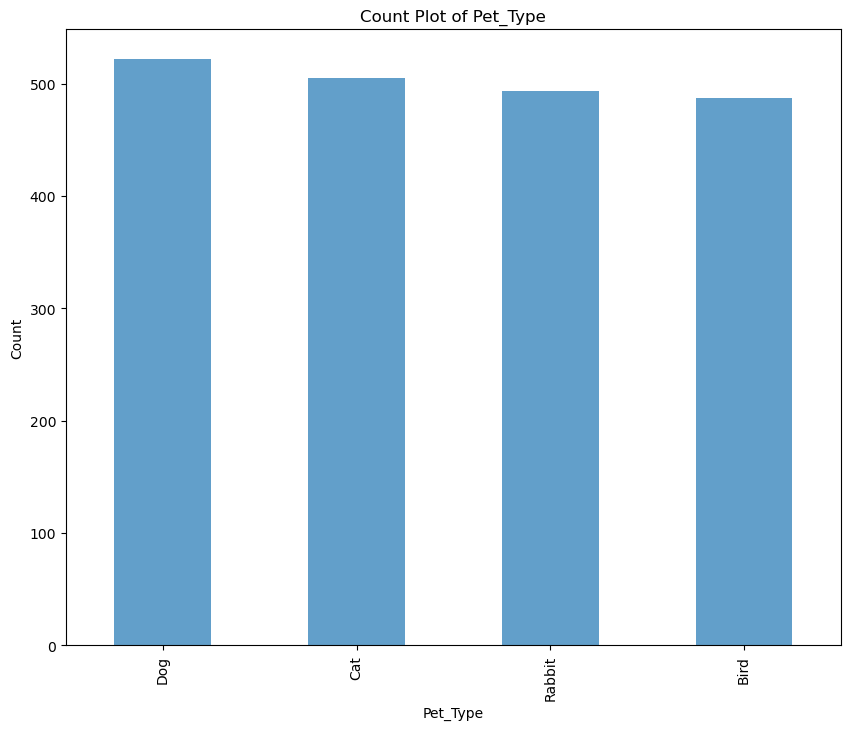

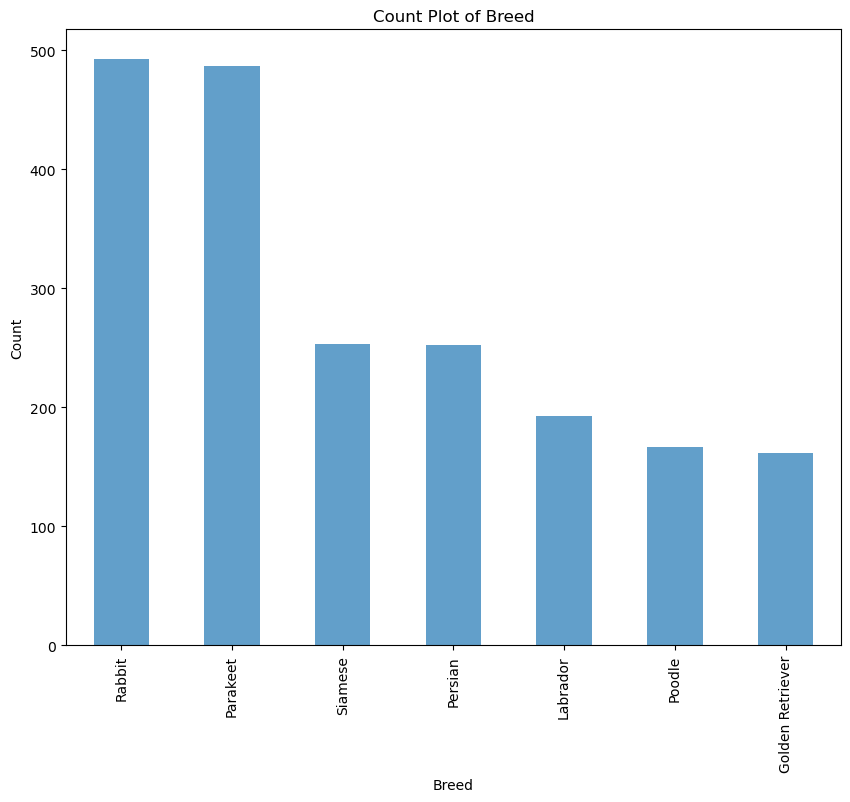

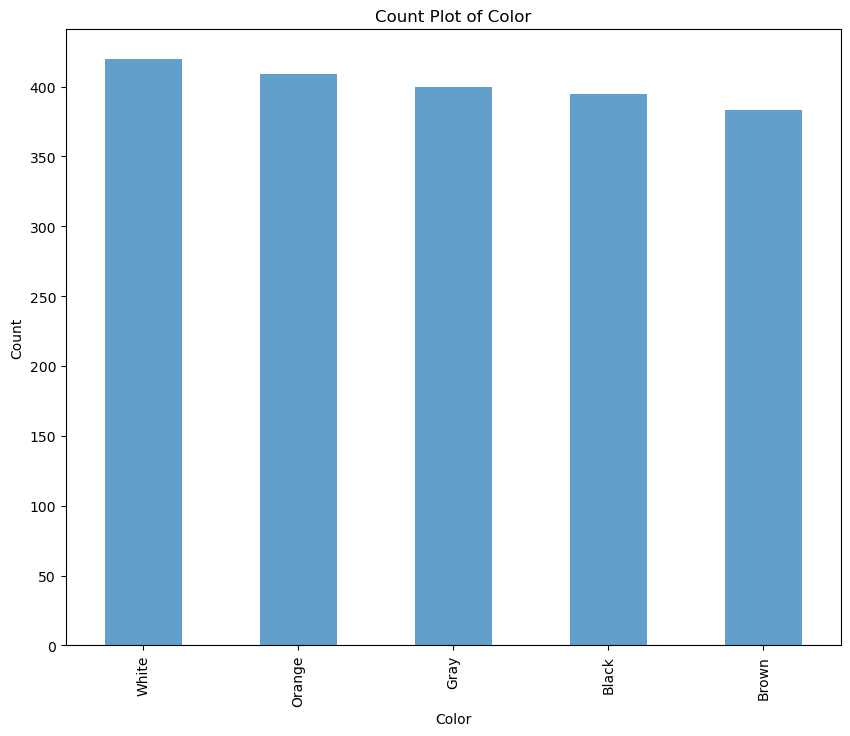

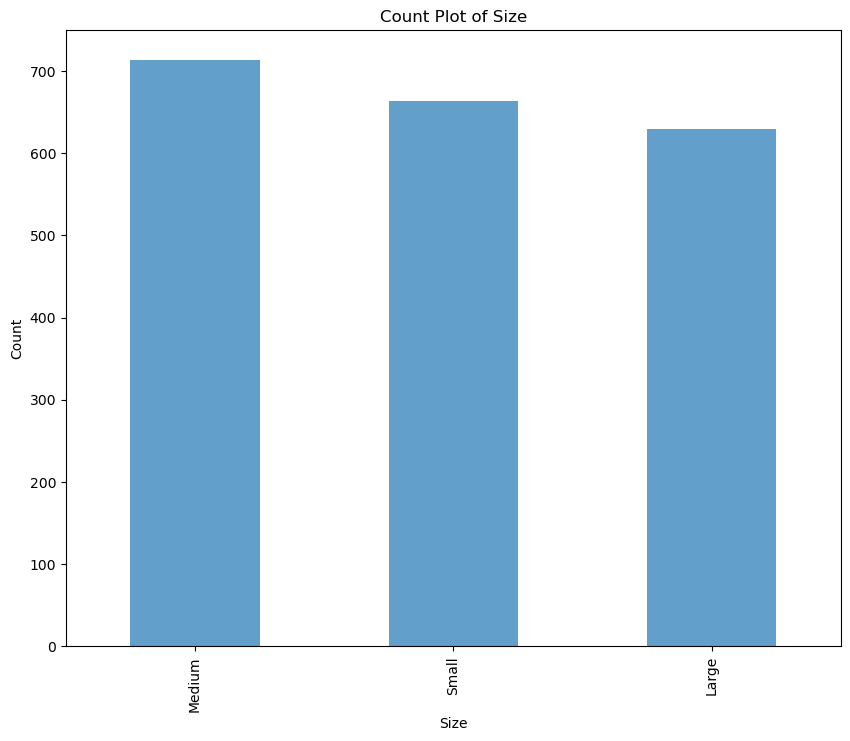

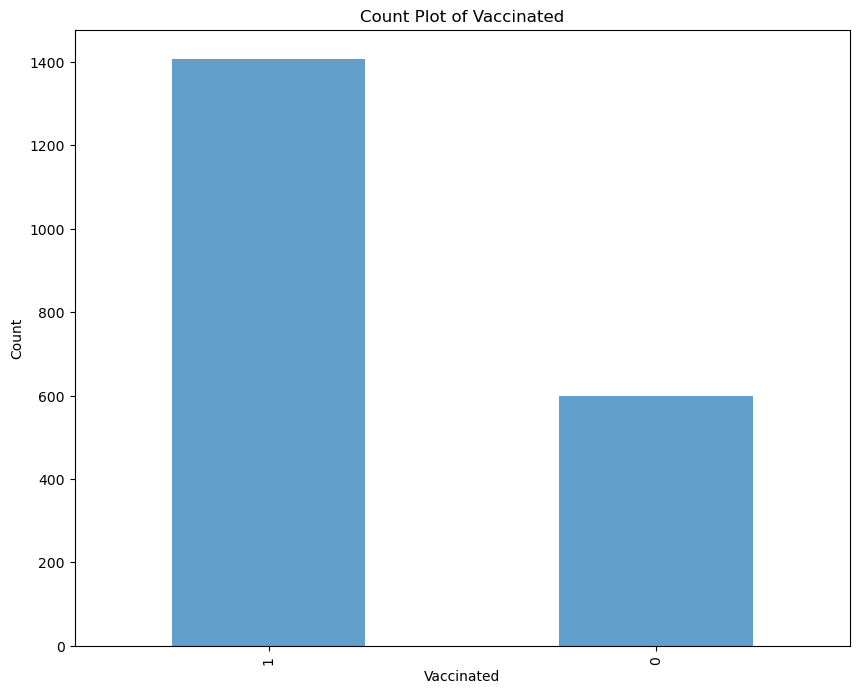

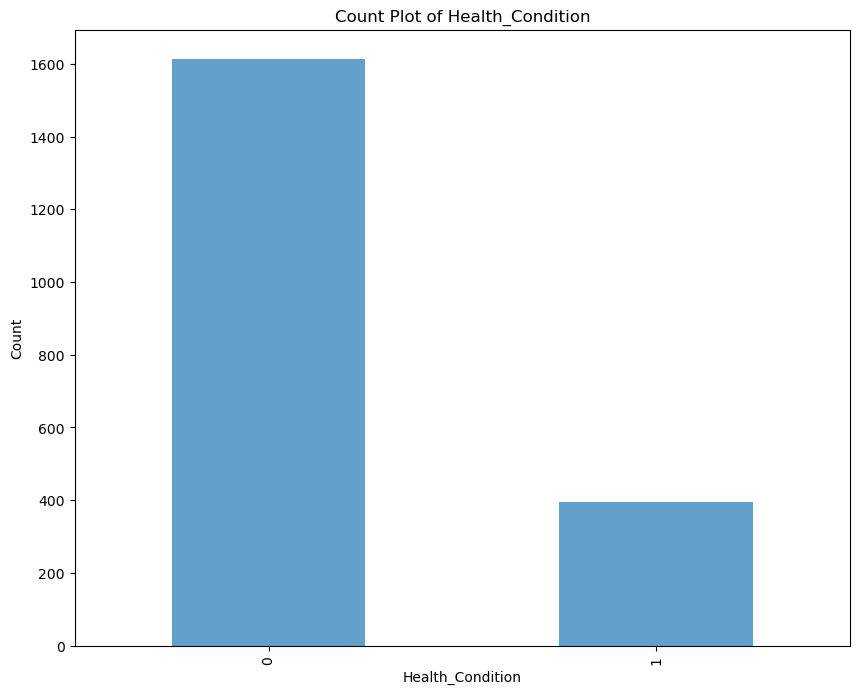

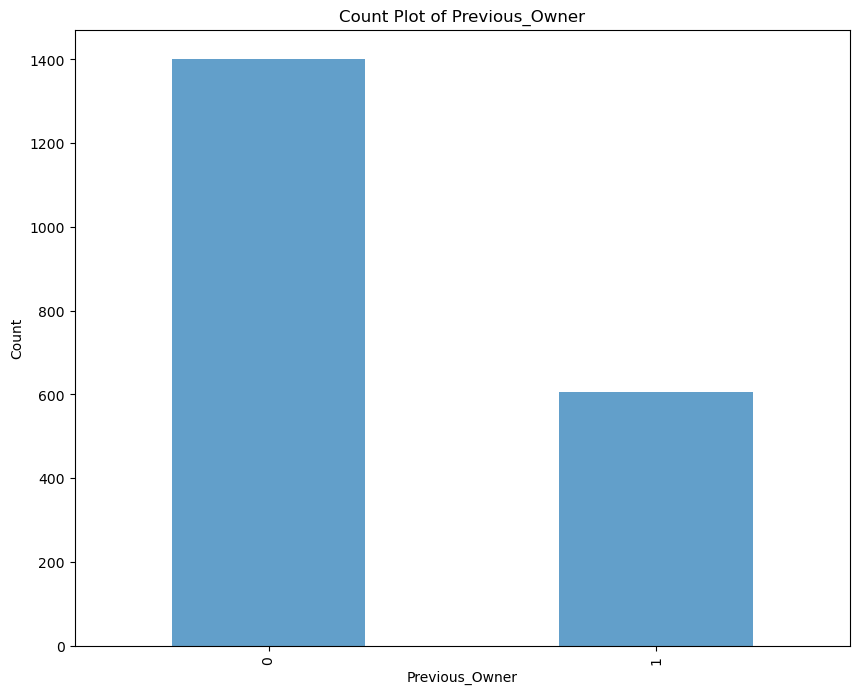

In [114]:
# Distribution plots
categorical_features = ['Pet_Type', 'Breed', 'Color', 'Size', 'Vaccinated', 'Health_Condition', 'Previous_Owner']
for feature in categorical_features:
    plt.figure(figsize=(10, 8))
    df_pet_adoption[feature].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig(f"output_dir/{feature}.png")
    plt.show()

In [47]:
# imports
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [48]:
# Review the info
df_pet_adoption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 500 to 2506
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pet_Type             2007 non-null   object 
 1   Breed                2007 non-null   object 
 2   Age_in_Months        2007 non-null   int64  
 3   Color                2007 non-null   object 
 4   Size                 2007 non-null   object 
 5   Weight_in_Kg         2007 non-null   float64
 6   Vaccinated           2007 non-null   int64  
 7   Health_Condition     2007 non-null   int64  
 8   Days_in_Shelter      2007 non-null   int64  
 9   Adoption_Fee         2007 non-null   int64  
 10  Previous_Owner       2007 non-null   int64  
 11  Adoption_Likelihood  2007 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 203.8+ KB


In [49]:
# Convert categorical data to numeric with `pd.get_dummies`
df_pet_adoption_dummies = pd.get_dummies(df_pet_adoption, columns=[
    'Pet_Type', 'Breed', 'Color', 'Size'
])
# Display the transformed data
df_pet_adoption_dummies

,Age_in_Months,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood,Pet_Type_Bird,Pet_Type_Cat,...,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White,Size_Large,Size_Medium,Size_Small
Pet_ID,,,,,,,,,,,,,,,,,,,,,
500,131,5.039768,1,0,27,140,0,0,True,False,...,False,False,False,False,False,True,False,True,False,False
501,73,16.086727,0,0,8,235,0,0,False,False,...,True,False,False,False,False,False,True,True,False,False
502,136,2.076286,0,0,85,385,0,0,False,False,...,False,False,False,False,False,True,False,False,True,False
503,97,3.339423,0,0,61,217,1,0,True,False,...,False,False,False,False,False,False,True,False,False,True
504,123,20.498100,0,0,28,14,1,0,False,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,72,27.039045,1,0,66,26,1,1,False,False,...,False,False,False,False,False,True,False,False,False,True
2503,124,4.726954,1,1,59,150,0,0,False,False,...,True,False,False,True,False,False,False,False,False,True
2504,113,1.758592,1,0,68,302,0,0,False,False,...,True,False,False,False,False,True,False,False,False,True


In [109]:
df_pet_adoption_dummies.columns.values.tolist()

['Age_in_Months',
 'Weight_in_Kg',
 'Vaccinated',
 'Health_Condition',
 'Days_in_Shelter',
 'Adoption_Fee',
 'Previous_Owner',
 'Adoption_Likelihood',
 'Pet_Type_Bird',
 'Pet_Type_Cat',
 'Pet_Type_Dog',
 'Pet_Type_Rabbit',
 'Breed_Golden Retriever',
 'Breed_Labrador',
 'Breed_Parakeet',
 'Breed_Persian',
 'Breed_Poodle',
 'Breed_Rabbit',
 'Breed_Siamese',
 'Color_Black',
 'Color_Brown',
 'Color_Gray',
 'Color_Orange',
 'Color_White',
 'Size_Large',
 'Size_Medium',
 'Size_Small']

# Create a Logistic Regression Model 

In [51]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_pet_adoption_dummies["Adoption_Likelihood"]

# Separate the X variable, the features
X = df_pet_adoption_dummies.drop(columns=["Adoption_Likelihood"])


In [52]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(1505, 26)

In [53]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Ensure y_train is a 1D array
y_train = y_train.ravel()

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

logistic_regression_model = LogisticRegression(solver='lbfgs',max_iter=1000, random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [54]:
#Score the model using the test data

print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9089700996677741
Testing Data Score: 0.9083665338645418


In [63]:
# Make a prediction using the testing data
#Generate testing and training predictions

training_predictions = lr_model.predict(X_train)
testing_predictions = logistic_regression_model.predict(X_test)


In [64]:
# Predict outcomes for test data set and show in a dataframe
results_df = pd.DataFrame({"Prediction": testing_predictions, "Actual":y_test})
results_df.reset_index(drop=True, inplace=True)
results_df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
497,0,0
498,0,0
499,1,1
500,0,0


In [65]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, testing_predictions)

0.9083665338645418

In [66]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, testing_predictions)

array([[334,   9],
       [ 37, 122]], dtype=int64)

In [67]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       343
           1       0.93      0.77      0.84       159

    accuracy                           0.91       502
   macro avg       0.92      0.87      0.89       502
weighted avg       0.91      0.91      0.91       502



## Matrix and score on training data for comparison

In [68]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[978  27]
 [110 390]]


In [69]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1005
           1       0.94      0.78      0.85       500

    accuracy                           0.91      1505
   macro avg       0.92      0.88      0.89      1505
weighted avg       0.91      0.91      0.91      1505



# Predicting Adoption with Random Forest Model

In [82]:
# Define features set
X_rf = df_pet_adoption_dummies.copy()
X_rf.drop("Adoption_Likelihood", axis=1, inplace=True)
X_rf.head()

,Age_in_Months,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Pet_Type_Bird,Pet_Type_Cat,Pet_Type_Dog,...,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White,Size_Large,Size_Medium,Size_Small
Pet_ID,,,,,,,,,,,,,,,,,,,,,
500,131,5.039768,1,0,27,140,0,True,False,False,...,False,False,False,False,False,True,False,True,False,False
501,73,16.086727,0,0,8,235,0,False,False,False,...,True,False,False,False,False,False,True,True,False,False
502,136,2.076286,0,0,85,385,0,False,False,True,...,False,False,False,False,False,True,False,False,True,False
503,97,3.339423,0,0,61,217,1,True,False,False,...,False,False,False,False,False,False,True,False,False,True
504,123,20.498100,0,0,28,14,1,False,False,False,...,True,False,False,False,True,False,False,True,False,False


In [95]:
# Define target vector
y_rf = df_pet_adoption_dummies["Adoption_Likelihood"].ravel()

y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [84]:
# Splitting into Train and Test sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, random_state=78)

In [72]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [86]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_rf_train)

In [87]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_rf_train)
X_test_scaled = X_scaler.transform(X_rf_test)

## Fitting the Random Forest Model


In [96]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [97]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_rf_train)

## Making Predictions Using the Random Forest Model

In [90]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [91]:
# Calculating the confusion matrix
cm = confusion_matrix(y_rf_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_rf_test, predictions)

In [92]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_rf_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,338,9
Actual 1,24,131


Accuracy Score : 0.9342629482071713
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.94      0.85      0.89       155

    accuracy                           0.93       502
   macro avg       0.93      0.91      0.92       502
weighted avg       0.93      0.93      0.93       502



## Feature Importance

In [101]:
# Get the feature importance array

importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances and sort it
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List the top 10 most important features
feature_importance_df.head(10)

,Feature,Importance
24,Size_Medium,0.154879
0,Age_in_Months,0.154187
2,Vaccinated,0.123601
3,Health_Condition,0.085406
5,Adoption_Fee,0.074451
1,Weight_in_Kg,0.070881
12,Breed_Labrador,0.063364
4,Days_in_Shelter,0.060725
23,Size_Large,0.049380
25,Size_Small,0.046000


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

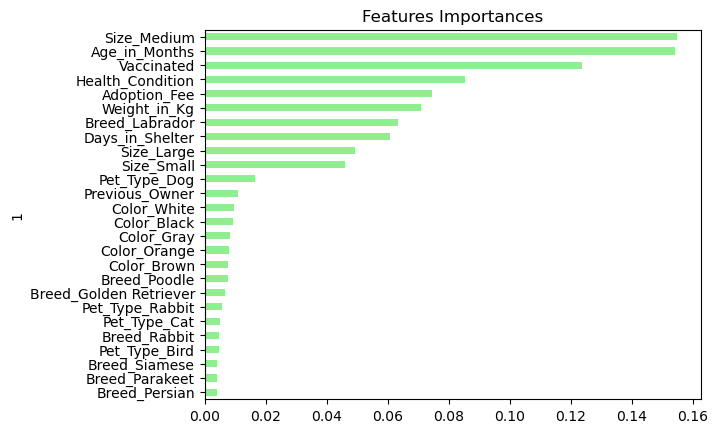

In [103]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [108]:
import joblib

# Save the model
joblib.dump(rf_model, 'model.pkl')


['model.pkl']